# **Face and Eye Detection with Haar Cascade Classifiers**

####**In this lesson we'll learn:**
1. To use a Haarcascade Classifer to detect faces
2. To use a Haarcascade Classifer to detect eyes
3. To use a Haarcascade Classifer to detect faces and eyes from your webcam in Colab
# **Haar Cascade 분류기를 사용한 얼굴 및 눈 감지**
1. Haarcascade Classifer를 사용하여 얼굴을 탐지하는 방법
2. Haarcascade Classifer를 사용하여 눈을 감지하는 방법
3. Haarcascade Classifer를 사용하여 웹캠에서 얼굴과 눈을 감지하려면 다음과 같이 하십시오

In [3]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images and Haarcascade Classifiers
# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!gdown --id 1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U

!unzip -qq images.zip
!unzip -qq haarcascades.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=ced0845c-5ca6-45f6-b2a4-b2821f727451
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 59.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
To: /content/haarcascades.zip
100% 276k/276k [00:00<00:00, 83.1MB/s]
replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace __MACOSX/images/._castara.jp

## **Simple Face Detection using Haarcascade Classifiers**

### **Firstly, What is Object Detection?**

![](https://miro.medium.com/max/739/1*zlWrCk1hBBFRXa5t84lmHQ.jpeg)

**Object Detection** is the ability to detect and classify individual objects in an image and draw a bounding box over the object's area.

[링크 텍스트](https://)## **HAAR Cascade Classifiers**

Developed by Viola and Jones in 2001.

An object detection method that uses a series of classifiers (cascade) to identify objects in an image. They are trained to identify one type of object, however, we can use several of them in parallel e.g. detecting eyes and faces together. HAAR Classifiers are trained using lots of positive images (i.e. images with the object present) and negative images (i.e. images without the object present).
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/haar.png)



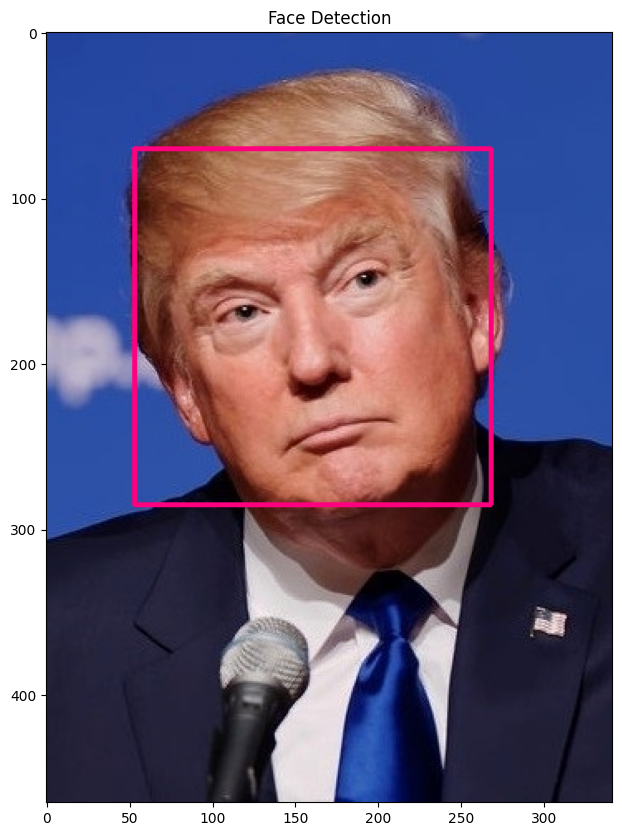

In [7]:
# OpenCV의 CascadeClassifier 함수를 사용하여 당사의 위치를 확인합니다
# 분류기(XML 파일 형식)가 저장됩니다
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# 이미지를 로드한 다음 그레이스케일로 변환합니다
image = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 우리의 분류기는 감지된 얼굴의 ROI를 튜플로 반환합니다
# 왼쪽 상단 좌표와 오른쪽 하단 좌표를 저장합니다
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# 얼굴이 감지되지 않으면 face_classifier가 반환되고 빈 튜플
if len(faces) == 0:
    print("No faces found")

# 우리는 얼굴 배열을 반복하고 직사각형을 그립니다
# 얼굴 하나하나에 걸쳐
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

## **Simple Eye & Face Detection using Haarcascade Classifiers**

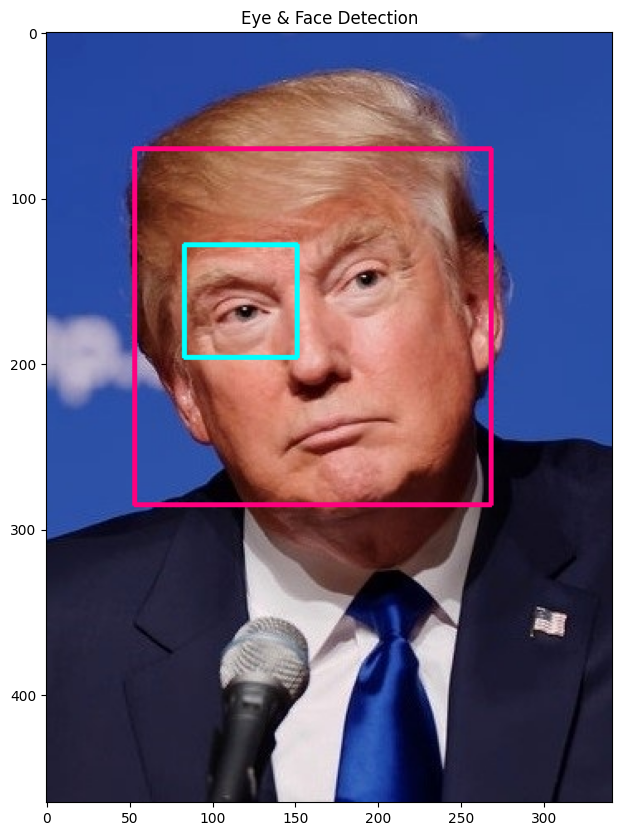

In [13]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

img = cv2.imread('images/Trump.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# 얼굴이 감지되지 않으면 face_classifier가 반환되고 빈 튜플
if len(faces) == 0:
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.5, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

## **Using Colab's Code Snippets let's access the webcam for an input**

Note: Requires your computer to have a webcam

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


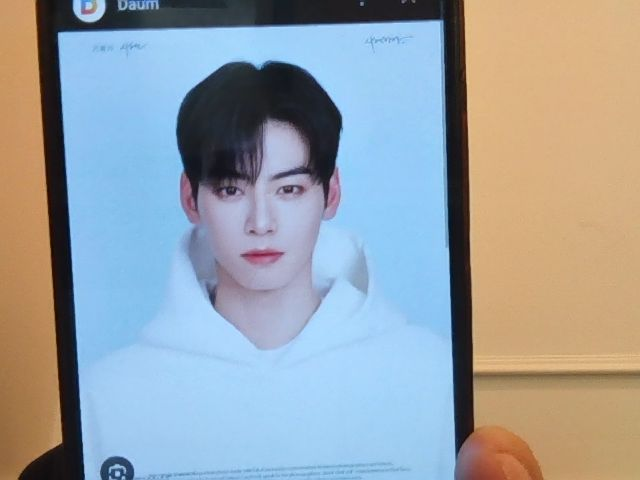

In [16]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

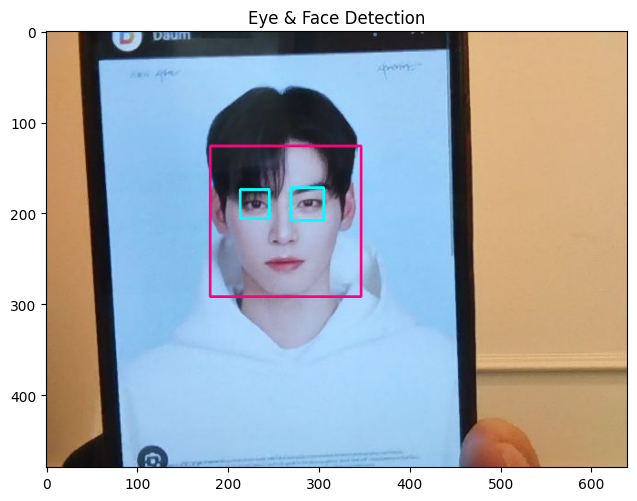

In [18]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

img = cv2.imread('photo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if len(faces) == 0:
    print("No faces found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)

### **Bonus Code - Use your webcam to do live face and eye detection**

This only works on a local machine, will not work in Colab

In [ ]:
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img

    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)

        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)

    roi_color = cv2.flip(roi_color,1)
    return roi_color

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break

cap.release()
cv2.destroyAllWindows()